In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
ret=pd.read_csv("48_Industry_Portfolios_value_weighted_average_main.csv", header=0, index_col=0)/100
ret.index=pd.to_datetime(ret.index, format="%Y%m").to_period("M")
ret = ret.loc["1990-01":]
ret.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1999-01,0.0235,-0.0421,-0.0434,-0.0166,-0.1225,0.0104,0.0924,0.0000,-0.0205,0.0580,...,0.0237,0.0087,-0.0033,0.0333,0.0124,-0.0035,-0.0287,0.0053,0.1220,-0.0672
1999-02,-0.1150,-0.0319,-0.1084,-0.0132,-0.1600,0.0478,0.0483,0.0011,-0.0136,0.0108,...,-0.0203,-0.0114,-0.0637,-0.0100,0.0692,-0.0043,0.0298,-0.0856,0.0050,0.0007
1999-03,0.2856,-0.0498,-0.0324,-0.0166,-0.0900,0.0231,-0.0584,0.0341,0.0481,0.0072,...,0.0697,0.0300,-0.0330,0.0351,0.0361,0.0182,0.0250,-0.0290,0.0973,-0.0260
1999-04,0.0265,0.0080,0.1121,0.0505,0.0009,0.1325,0.0363,0.0549,0.0419,0.0854,...,0.0315,0.1172,0.0541,-0.0045,-0.0037,0.0800,0.0242,0.0651,0.0792,0.1870
1999-05,-0.0124,0.0393,0.0454,-0.0062,0.1000,-0.0480,-0.0545,-0.0156,-0.0299,-0.0265,...,-0.0274,-0.0496,0.0255,-0.0360,-0.0690,-0.0627,0.0029,0.0295,-0.0257,0.0093


In [5]:
ret.columns

Index(['Agric', 'Food ', 'Soda ', 'Beer ', 'Smoke', 'Toys ', 'Fun  ', 'Books',
       'Hshld', 'Clths', 'Hlth ', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach ', 'ElcEq', 'Autos', 'Aero ',
       'Ships', 'Guns ', 'Gold ', 'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm',
       'PerSv', 'BusSv', 'Comps', 'Chips', 'LabEq', 'Paper', 'Boxes', 'Trans',
       'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin  ', 'Other'],
      dtype='object')

In [6]:
ret.columns=ret.columns.str.strip()
ret.columns

Index(['Agric', 'Food', 'Soda', 'Beer', 'Smoke', 'Toys', 'Fun', 'Books',
       'Hshld', 'Clths', 'Hlth', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach', 'ElcEq', 'Autos', 'Aero',
       'Ships', 'Guns', 'Gold', 'Mines', 'Coal', 'Oil', 'Util', 'Telcm',
       'PerSv', 'BusSv', 'Comps', 'Chips', 'LabEq', 'Paper', 'Boxes', 'Trans',
       'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin', 'Other'],
      dtype='object')

## To compute the 95% Value-at-Risk (VaR) using the Cornish-Fisher expansion for all industries from Fama-French 48 Industry Portfolios (January 1990 onward), follow these detailed steps:
### Step 1: Load and Preprocess the Data
### Load the dataset (assuming it's "48_Industry_Portfolios_value_weighted_average.csv").
### Convert index to datetime and filter data from January 1990 onward.
### Ensure all returns are in decimal format (divide by 100 if necessary).

## Step 2: Compute the Modified Cornish-Fisher VaR
### The Cornish-Fisher Expansion adjusts for skewness and kurtosis:


### Step 3: Visualize Results
### Sort industries based on VaR.
### Plot a bar chart showing the computed 95% VaR values.

### Computing skewness and kurtosis

In [9]:
(((ret-ret.mean())**3).mean())/((ret.std(ddof=0))**3)
# the scipy formula uses population std. dev., so to be comparable set dof=0

Agric    0.513549
Food    -0.022395
Soda    -0.175468
Beer    -0.240578
Smoke   -0.171744
Toys    -0.150748
Fun     -0.206881
Books    0.234927
Hshld   -0.492253
Clths   -0.115207
Hlth    -0.219583
MedEq   -0.654786
Drugs   -0.122264
Chems   -0.120601
Rubbr    0.067937
Txtls    0.492206
BldMt   -0.180062
Cnstr   -0.329004
Steel   -0.060332
FabPr    0.140638
Mach    -0.397158
ElcEq   -0.134416
Autos    0.845760
Aero    -0.670145
Ships   -0.042263
Guns    -0.487536
Gold     0.237357
Mines   -0.289681
Coal     0.018673
Oil      0.168823
Util    -0.602688
Telcm   -0.181564
PerSv   -0.271701
BusSv   -0.154060
Comps   -0.385597
Chips   -0.478076
LabEq   -0.253624
Paper    0.127994
Boxes   -0.376638
Trans   -0.250862
Whlsl   -0.334712
Rtail   -0.018662
Meals   -0.377419
Banks   -0.514127
Insur   -0.515583
RlEst    0.810732
Fin     -0.288365
Other   -0.427384
dtype: float64

In [10]:
(((ret-ret.mean())**4).mean())/((ret.std(ddof=0))**4)
# the scipy formula uses population std. dev., so to be comparable set dof=0

Agric     4.276336
Food      4.239753
Soda      5.548530
Beer      4.236176
Smoke     5.746908
Toys      3.594749
Fun       5.548100
Books     5.698977
Hshld     4.116875
Clths     4.047193
Hlth      3.696971
MedEq     4.494524
Drugs     3.076463
Chems     4.230377
Rubbr     5.535509
Txtls     9.345780
BldMt     6.477486
Cnstr     4.144919
Steel     3.665563
FabPr     4.846599
Mach      4.318646
ElcEq     3.711855
Autos     6.987486
Aero      7.693043
Ships     4.757195
Guns      5.788398
Gold      3.509608
Mines     3.936431
Coal      3.425166
Oil       6.631085
Util      3.578997
Telcm     4.101281
PerSv     4.132694
BusSv     4.176855
Comps     4.931071
Chips     4.437881
LabEq     3.903291
Paper     4.950474
Boxes     3.500682
Trans     3.391909
Whlsl     4.371935
Rtail     3.775017
Meals     4.741154
Banks     4.992406
Insur     6.521027
RlEst    17.195600
Fin       3.370545
Other     5.051024
dtype: float64

## STD

In [12]:
ret.std()

Agric    0.065550
Food     0.039034
Soda     0.060888
Beer     0.043153
Smoke    0.066909
Toys     0.071349
Fun      0.082855
Books    0.063198
Hshld    0.041148
Clths    0.065957
Hlth     0.063807
MedEq    0.048047
Drugs    0.043084
Chems    0.062039
Rubbr    0.062028
Txtls    0.093698
BldMt    0.069830
Cnstr    0.075330
Steel    0.096802
FabPr    0.094254
Mach     0.070506
ElcEq    0.070179
Autos    0.101194
Aero     0.067507
Ships    0.076138
Guns     0.062862
Gold     0.104759
Mines    0.087653
Coal     0.137075
Oil      0.071328
Util     0.043274
Telcm    0.053181
PerSv    0.060440
BusSv    0.063422
Comps    0.076952
Chips    0.081648
LabEq    0.065697
Paper    0.053343
Boxes    0.059534
Trans    0.057948
Whlsl    0.050807
Rtail    0.050296
Meals    0.049287
Banks    0.064123
Insur    0.053762
RlEst    0.081760
Fin      0.070883
Other    0.056052
dtype: float64

## Semi-std

In [14]:
ret<0

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1999-01,False,True,True,True,True,False,False,False,True,False,...,False,False,True,False,False,True,True,False,False,True
1999-02,True,True,True,True,True,False,False,False,True,False,...,True,True,True,True,False,True,False,True,False,False
1999-03,False,True,True,True,True,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,True
1999-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1999-05,True,False,False,True,False,True,True,True,True,True,...,True,True,False,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2024-09,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,True,True,False,False,True
2024-10,False,True,True,True,False,False,False,False,True,True,...,True,False,True,True,True,False,True,False,False,True
2024-11,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
ret[ret<0].std()

Agric    0.035864
Food     0.025594
Soda     0.045000
Beer     0.029583
Smoke    0.047566
Toys     0.046924
Fun      0.059126
Books    0.041564
Hshld    0.030297
Clths    0.043970
Hlth     0.043195
MedEq    0.035890
Drugs    0.026167
Chems    0.041579
Rubbr    0.042584
Txtls    0.064040
BldMt    0.050273
Cnstr    0.049836
Steel    0.061015
FabPr    0.059695
Mach     0.049186
ElcEq    0.047309
Autos    0.058551
Aero     0.053167
Ships    0.052020
Guns     0.047167
Gold     0.060068
Mines    0.055664
Coal     0.081844
Oil      0.047176
Util     0.031145
Telcm    0.037056
PerSv    0.040568
BusSv    0.043187
Comps    0.057135
Chips    0.058622
LabEq    0.044371
Paper    0.034287
Boxes    0.040960
Trans    0.038033
Whlsl    0.034467
Rtail    0.032459
Meals    0.033557
Banks    0.047576
Insur    0.040872
RlEst    0.060834
Fin      0.046442
Other    0.041433
dtype: float64

## a. Cornish-Fisher VaR

In [17]:
z = stats.norm.ppf(0.05)
s=scipy.stats.skew(ret[-120:]) #for the last 10 years (120 months)
k=scipy.stats.kurtosis(ret[-120:])
z_cf=(z
      + (z**2 - 1)*s/6
      + (z**3 -3*z)*(k-3)/24 
      - (2*z**3 - 5*z)*(s**2)/36)
z_cf

array([-1.63139608, -1.6909599 , -1.82406802, -1.69961799, -1.81041931,
       -1.73205936, -1.79898027, -1.64096785, -1.74355191, -1.77887371,
       -1.76787081, -1.81284309, -1.74130942, -1.77471503, -1.7421967 ,
       -1.74287303, -1.78105066, -1.78443419, -1.64844756, -1.65629406,
       -1.75169577, -1.69467061, -1.40247587, -1.67958684, -1.74852106,
       -1.53668929, -1.50959836, -1.6963904 , -1.72424485, -1.55790163,
       -1.82238906, -1.737174  , -1.81626879, -1.75885748, -1.76247236,
       -1.76430137, -1.76311718, -1.75917817, -1.72705954, -1.75243555,
       -1.72658732, -1.62159532, -1.73489357, -1.79226079, -1.70874113,
       -1.78939383, -1.72375023, -1.69784698])

In [18]:
var_cf=-1*(ret[-120:].mean()+z_cf*ret[-120:].std())
var_cf

Agric    0.093294
Food     0.062568
Soda     0.071084
Beer     0.062667
Smoke    0.096627
Toys     0.138143
Fun      0.124895
Books    0.103479
Hshld    0.065793
Clths    0.111650
Hlth     0.107990
MedEq    0.083621
Drugs    0.068405
Chems    0.104808
Rubbr    0.091572
Txtls    0.162094
BldMt    0.113241
Cnstr    0.122692
Steel    0.151143
FabPr    0.172895
Mach     0.101316
ElcEq    0.116488
Autos    0.146700
Aero     0.110376
Ships    0.110723
Guns     0.073558
Gold     0.153556
Mines    0.131726
Coal     0.229958
Oil      0.129583
Util     0.070554
Telcm    0.082029
PerSv    0.097991
BusSv    0.077925
Comps    0.086138
Chips    0.097193
LabEq    0.085618
Paper    0.085272
Boxes    0.088479
Trans    0.102067
Whlsl    0.082472
Rtail    0.071677
Meals    0.077213
Banks    0.105269
Insur    0.067575
RlEst    0.136062
Fin      0.093355
Other    0.072625
dtype: float64

In [19]:
varlist=[var_cf]
varmatrix=pd.concat(varlist, axis=1)
varmatrix.columns=["Modified CF"]
varmatrix

,Modified CF
Agric,0.093294
Food,0.062568
Soda,0.071084
Beer,0.062667
Smoke,0.096627
Toys,0.138143
Fun,0.124895
Books,0.103479
Hshld,0.065793
Clths,0.111650


<Axes: title={'center': 'Modified CF'}>

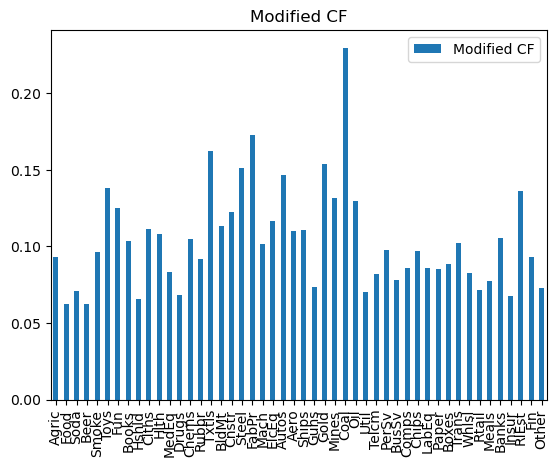

In [20]:
%matplotlib inline
varmatrix.plot.bar(title="Modified CF")

## b. Compute the Sharpe ratio

### Compute the Annualized Sharpe Ratio
### Compute monthly mean return for each industry.
### Compute monthly standard deviation (volatility).
### Convert these to annualized values:
### Annualized return = Monthly return × 12
### Annualized volatility = Monthly volatility × sqrt(12)

In [23]:
ret.mean()

Agric    0.009467
Food     0.006128
Soda     0.008415
Beer     0.006622
Smoke    0.011748
Toys     0.004665
Fun      0.012273
Books    0.005046
Hshld    0.006176
Clths    0.009679
Hlth     0.007194
MedEq    0.009133
Drugs    0.007125
Chems    0.008204
Rubbr    0.008942
Txtls    0.007469
BldMt    0.010205
Cnstr    0.012182
Steel    0.009066
FabPr    0.008501
Mach     0.011945
ElcEq    0.008256
Autos    0.011501
Aero     0.010693
Ships    0.013870
Guns     0.012740
Gold     0.007960
Mines    0.012504
Coal     0.014309
Oil      0.009301
Util     0.007775
Telcm    0.004046
PerSv    0.005785
BusSv    0.009395
Comps    0.009239
Chips    0.012353
LabEq    0.010846
Paper    0.006307
Boxes    0.008880
Trans    0.008887
Whlsl    0.008416
Rtail    0.009502
Meals    0.010101
Banks    0.006927
Insur    0.008554
RlEst    0.008217
Fin      0.010127
Other    0.004845
dtype: float64

In [24]:
ret.std()

Agric    0.065550
Food     0.039034
Soda     0.060888
Beer     0.043153
Smoke    0.066909
Toys     0.071349
Fun      0.082855
Books    0.063198
Hshld    0.041148
Clths    0.065957
Hlth     0.063807
MedEq    0.048047
Drugs    0.043084
Chems    0.062039
Rubbr    0.062028
Txtls    0.093698
BldMt    0.069830
Cnstr    0.075330
Steel    0.096802
FabPr    0.094254
Mach     0.070506
ElcEq    0.070179
Autos    0.101194
Aero     0.067507
Ships    0.076138
Guns     0.062862
Gold     0.104759
Mines    0.087653
Coal     0.137075
Oil      0.071328
Util     0.043274
Telcm    0.053181
PerSv    0.060440
BusSv    0.063422
Comps    0.076952
Chips    0.081648
LabEq    0.065697
Paper    0.053343
Boxes    0.059534
Trans    0.057948
Whlsl    0.050807
Rtail    0.050296
Meals    0.049287
Banks    0.064123
Insur    0.053762
RlEst    0.081760
Fin      0.070883
Other    0.056052
dtype: float64

In [25]:
annual_vol=ret.std() * np.sqrt(12)
annual_vol

Agric    0.227071
Food     0.135219
Soda     0.210921
Beer     0.149487
Smoke    0.231778
Toys     0.247160
Fun      0.287019
Books    0.218926
Hshld    0.142540
Clths    0.228483
Hlth     0.221035
MedEq    0.166440
Drugs    0.149249
Chems    0.214909
Rubbr    0.214872
Txtls    0.324578
BldMt    0.241900
Cnstr    0.260950
Steel    0.335332
FabPr    0.326507
Mach     0.244241
ElcEq    0.243108
Autos    0.350545
Aero     0.233853
Ships    0.263750
Guns     0.217762
Gold     0.362897
Mines    0.303639
Coal     0.474842
Oil      0.247086
Util     0.149907
Telcm    0.184225
PerSv    0.209369
BusSv    0.219700
Comps    0.266569
Chips    0.282838
LabEq    0.227582
Paper    0.184784
Boxes    0.206232
Trans    0.200738
Whlsl    0.176001
Rtail    0.174231
Meals    0.170736
Banks    0.222127
Insur    0.186238
RlEst    0.283225
Fin      0.245544
Other    0.194168
dtype: float64

In [26]:
ret.shape

(312, 48)

## Different code for annualizing

In [28]:
n_years=ret.shape[0]/12
n_years

26.0

In [29]:
annual_ret=(1+ret).prod()**(1/n_years)-1
annual_ret

Agric    0.092205
Food     0.066381
Soda     0.081535
Beer     0.070464
Smoke    0.120150
Toys     0.025508
Fun      0.110806
Books    0.037403
Hshld    0.065784
Clths    0.093864
Hlth     0.063540
MedEq    0.099865
Drugs    0.077007
Chems    0.077992
Rubbr    0.087697
Txtls    0.038000
BldMt    0.096976
Cnstr    0.117618
Steel    0.053428
FabPr    0.049895
Mach     0.119158
ElcEq    0.071697
Autos    0.082074
Aero     0.104746
Ships    0.140000
Guns     0.136685
Gold     0.030845
Mines    0.108250
Coal     0.059477
Oil      0.084310
Util     0.085108
Telcm    0.031969
PerSv    0.048346
BusSv    0.092266
Comps    0.077184
Chips    0.112699
LabEq    0.109251
Paper    0.060360
Boxes    0.088524
Trans    0.089950
Whlsl    0.088852
Rtail    0.103581
Meals    0.111932
Banks    0.059484
Insur    0.088422
RlEst    0.060492
Fin      0.095057
Other    0.039707
dtype: float64

In [30]:
annual_ret/annual_vol

Agric    0.406063
Food     0.490914
Soda     0.386564
Beer     0.471376
Smoke    0.518385
Toys     0.103206
Fun      0.386057
Books    0.170846
Hshld    0.461514
Clths    0.410812
Hlth     0.287467
MedEq    0.600005
Drugs    0.515965
Chems    0.362909
Rubbr    0.408134
Txtls    0.117076
BldMt    0.400894
Cnstr    0.450732
Steel    0.159327
FabPr    0.152814
Mach     0.487869
ElcEq    0.294917
Autos    0.234131
Aero     0.447915
Ships    0.530804
Guns     0.627679
Gold     0.084997
Mines    0.356508
Coal     0.125257
Oil      0.341217
Util     0.567736
Telcm    0.173534
PerSv    0.230912
BusSv    0.419965
Comps    0.289547
Chips    0.398457
LabEq    0.480053
Paper    0.326654
Boxes    0.429243
Trans    0.448099
Whlsl    0.504837
Rtail    0.594500
Meals    0.655586
Banks    0.267791
Insur    0.474780
RlEst    0.213583
Fin      0.387126
Other    0.204496
dtype: float64

### Sharpe Ratio
### Annual Risk free rate is assummed to be 3%

In [32]:
rf=0.03
sharpe_ratio=(annual_ret-rf)/annual_vol
sharpe_ratio

Agric    0.273946
Food     0.269052
Soda     0.244331
Beer     0.270689
Smoke    0.388950
Toys    -0.018173
Fun      0.281534
Books    0.033814
Hshld    0.251047
Clths    0.279511
Hlth     0.151742
MedEq    0.419761
Drugs    0.314959
Chems    0.223315
Rubbr    0.268516
Txtls    0.024649
BldMt    0.276876
Cnstr    0.335767
Steel    0.069864
FabPr    0.060932
Mach     0.365040
ElcEq    0.171515
Autos    0.148550
Aero     0.319629
Ships    0.417060
Guns     0.489914
Gold     0.002329
Mines    0.257706
Coal     0.062078
Oil      0.219801
Util     0.367611
Telcm    0.010689
PerSv    0.087624
BusSv    0.283415
Comps    0.177005
Chips    0.292390
LabEq    0.348232
Paper    0.164302
Boxes    0.283776
Trans    0.298650
Whlsl    0.334383
Rtail    0.422315
Meals    0.479876
Banks    0.132733
Insur    0.313696
RlEst    0.107660
Fin      0.264949
Other    0.049991
dtype: float64

## Sharpe Ratio Comparisons:

In [34]:
varlist=[sharpe_ratio]
varmatrix=pd.concat(varlist, axis=1)
varmatrix.columns=["sharpe_ratio"]
varmatrix

,sharpe_ratio
Agric,0.273946
Food,0.269052
Soda,0.244331
Beer,0.270689
Smoke,0.388950
Toys,-0.018173
Fun,0.281534
Books,0.033814
Hshld,0.251047
Clths,0.279511


<Axes: title={'center': 'Sharpe_ratio comparison'}>

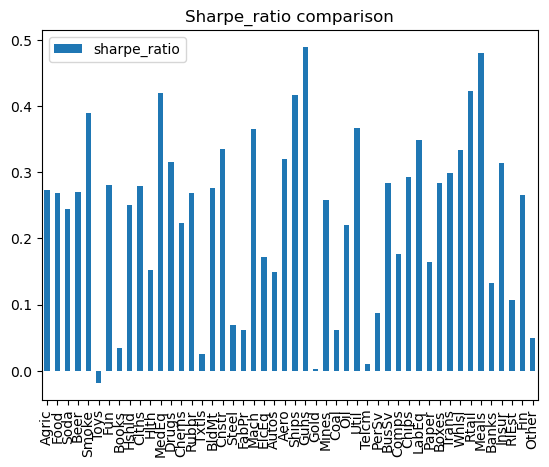

In [35]:
%matplotlib inline
varmatrix.plot.bar(title="Sharpe_ratio comparison")

### Observe a relation between the results of parts (a) and (b):
### There is a general inverse relationship between the Modified Cornish-Fisher VaR (Part a) and the Sharpe Ratio (Part b). Industries with higher downside risk (high VaR) do not necessarily have higher Sharpe Ratios. In fact, industries with moderate VaR levels tend to have the highest Sharpe Ratios, suggesting they offer a better balance between risk and return. Conversely, industries with extreme risk (high VaR) often have lower Sharpe Ratios, indicating that high downside risk negatively impacts risk-adjusted returns. This confirms that VaR and Sharpe Ratio are not perfectly correlated—higher risk does not always lead to better returns.

## Computing the CVaR (i.e., Beyond VaR)

In [38]:
ones=pd.DataFrame(1, index=ret.index, columns=ret.columns)
ones*var_cf*-1

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1999-01,-0.093294,-0.062568,-0.071084,-0.062667,-0.096627,-0.138143,-0.124895,-0.103479,-0.065793,-0.11165,...,-0.088479,-0.102067,-0.082472,-0.071677,-0.077213,-0.105269,-0.067575,-0.136062,-0.093355,-0.072625
1999-02,-0.093294,-0.062568,-0.071084,-0.062667,-0.096627,-0.138143,-0.124895,-0.103479,-0.065793,-0.11165,...,-0.088479,-0.102067,-0.082472,-0.071677,-0.077213,-0.105269,-0.067575,-0.136062,-0.093355,-0.072625
1999-03,-0.093294,-0.062568,-0.071084,-0.062667,-0.096627,-0.138143,-0.124895,-0.103479,-0.065793,-0.11165,...,-0.088479,-0.102067,-0.082472,-0.071677,-0.077213,-0.105269,-0.067575,-0.136062,-0.093355,-0.072625
1999-04,-0.093294,-0.062568,-0.071084,-0.062667,-0.096627,-0.138143,-0.124895,-0.103479,-0.065793,-0.11165,...,-0.088479,-0.102067,-0.082472,-0.071677,-0.077213,-0.105269,-0.067575,-0.136062,-0.093355,-0.072625
1999-05,-0.093294,-0.062568,-0.071084,-0.062667,-0.096627,-0.138143,-0.124895,-0.103479,-0.065793,-0.11165,...,-0.088479,-0.102067,-0.082472,-0.071677,-0.077213,-0.105269,-0.067575,-0.136062,-0.093355,-0.072625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08,-0.093294,-0.062568,-0.071084,-0.062667,-0.096627,-0.138143,-0.124895,-0.103479,-0.065793,-0.11165,...,-0.088479,-0.102067,-0.082472,-0.071677,-0.077213,-0.105269,-0.067575,-0.136062,-0.093355,-0.072625
2024-09,-0.093294,-0.062568,-0.071084,-0.062667,-0.096627,-0.138143,-0.124895,-0.103479,-0.065793,-0.11165,...,-0.088479,-0.102067,-0.082472,-0.071677,-0.077213,-0.105269,-0.067575,-0.136062,-0.093355,-0.072625
2024-10,-0.093294,-0.062568,-0.071084,-0.062667,-0.096627,-0.138143,-0.124895,-0.103479,-0.065793,-0.11165,...,-0.088479,-0.102067,-0.082472,-0.071677,-0.077213,-0.105269,-0.067575,-0.136062,-0.093355,-0.072625
2024-11,-0.093294,-0.062568,-0.071084,-0.062667,-0.096627,-0.138143,-0.124895,-0.103479,-0.065793,-0.11165,...,-0.088479,-0.102067,-0.082472,-0.071677,-0.077213,-0.105269,-0.067575,-0.136062,-0.093355,-0.072625


In [39]:
isbeyond=ret<(ones*var_cf*-1)
isbeyond

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1999-01,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1999-02,True,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1999-03,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1999-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1999-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-10,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
cvar=ret[isbeyond].mean()
cvar

Agric   -0.119394
Food    -0.087031
Soda    -0.111373
Beer    -0.093012
Smoke   -0.149200
Toys    -0.168100
Fun     -0.186669
Books   -0.137938
Hshld   -0.095338
Clths   -0.147192
Hlth    -0.145713
MedEq   -0.119545
Drugs   -0.085106
Chems   -0.145558
Rubbr   -0.128647
Txtls   -0.247830
BldMt   -0.156027
Cnstr   -0.184300
Steel   -0.206487
FabPr   -0.230370
Mach    -0.150325
ElcEq   -0.142647
Autos   -0.217240
Aero    -0.175773
Ships   -0.178254
Guns    -0.119643
Gold    -0.201788
Mines   -0.208740
Coal    -0.291643
Oil     -0.180800
Util    -0.100300
Telcm   -0.113230
PerSv   -0.133293
BusSv   -0.116063
Comps   -0.140213
Chips   -0.170590
LabEq   -0.119792
Paper   -0.110353
Boxes   -0.125658
Trans   -0.132909
Whlsl   -0.112992
Rtail   -0.096832
Meals   -0.115136
Banks   -0.148325
Insur   -0.115768
RlEst   -0.242800
Fin     -0.132380
Other   -0.121157
dtype: float64

##  Efficient Frontier Analysis

### Step 1: Load and Preprocess Data
### Load Fama-French 48 Industry Portfolios (monthly value-weighted returns) since January 1990.
### Convert index to datetime and format appropriately.
### Extract two selected industries for analysis: Food and Beer.

## Step-2

### Select Two Industries and Compute Portfolio Characteristics
### Choose Food and Beer industries.
### Compute annualized mean return and covariance matrix.

In [45]:
# Select two industries
industry_1 = "Food"
industry_2 = "Beer"
data = ret[[industry_1, industry_2]]

# Compute annualized returns and covariance
mean_returns = data.mean() * 12
cov_matrix = data.cov() * 12


### Construct Efficient Frontier
### Create portfolio combinations with weights in increments of 0.10.
### Compute expected returns and volatility for each portfolio

In [47]:
# Generate portfolio weights (increments of 0.10)
weights = np.linspace(0, 1, 11)
port_returns = []
port_vols = []

for w in weights:
    port_ret = w * mean_returns[industry_1] + (1 - w) * mean_returns[industry_2]
    port_vol = np.sqrt(
        w**2 * cov_matrix.loc[industry_1, industry_1] +
        (1 - w)**2 * cov_matrix.loc[industry_2, industry_2] +
        2 * w * (1 - w) * cov_matrix.loc[industry_1, industry_2]
    )
    port_returns.append(port_ret)
    port_vols.append(port_vol)


### Identify Minimum-Variance Portfolio
### Locate the portfolio with the lowest volatility.
### Extract weights, return, and volatility.

In [49]:
# Identify Minimum-Variance Portfolio
min_var_idx = np.argmin(port_vols)  # Find index of min volatility
min_var_vol = port_vols[min_var_idx]  # Minimum volatility
min_var_ret = port_returns[min_var_idx]  # Return corresponding to min volatility


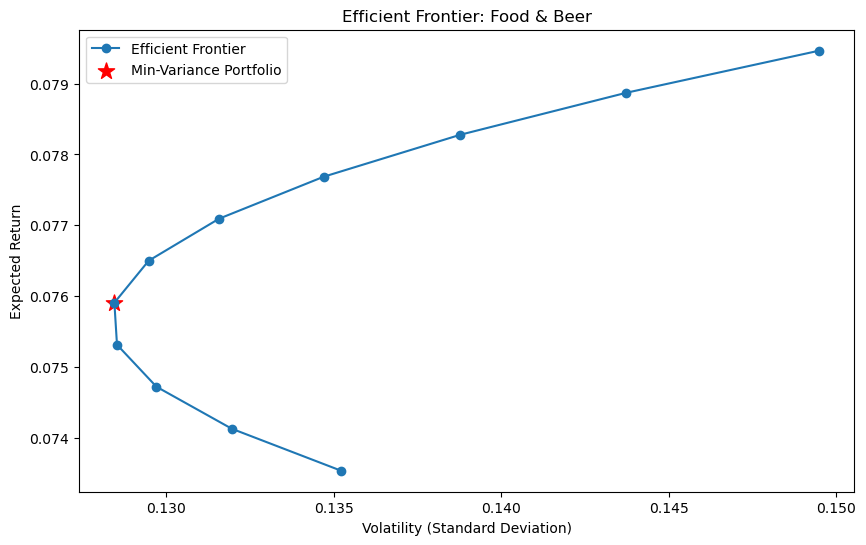

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(port_vols, port_returns, marker="o", linestyle="-", label="Efficient Frontier")
plt.scatter(min_var_vol, min_var_ret, color="red", marker="*", s=150, label="Min-Variance Portfolio")
plt.xlabel("Volatility (Standard Deviation)")
plt.ylabel("Expected Return")
plt.title(f"Efficient Frontier: {industry_1} & {industry_2}")
plt.legend()
plt.show()


### The attached plot illustrates the Efficient Frontier Analysis for two selected industries, Food and Beer, using annualized returns and volatilities. The blue curve represents the efficient frontier, which consists of various portfolios created by adjusting the weight combinations of the two assets in increments of 0.10, ranging from fully investing in one asset to the other. The x-axis denotes portfolio volatility (risk), while the y-axis represents the expected return. Each point on the curve corresponds to a different portfolio composition of Food and Beer.

The red star marks the minimum-variance portfolio (MVP), which is the portfolio with the lowest volatility, offering the most efficient balance between return and risk. This MVP is characterized by specific weights assigned to Food and Beer, along with its portfolio return and volatility. Investors seeking to minimize risk exposure while maintaining reasonable returns would prefer the minimum-variance portfolio, as it provides the optimal risk-return tradeoff for a two-asset portfolio.

## Display Minimum-Variance Portfolio Information

In [52]:
# Identify Minimum-Variance Portfolio
min_var_idx = np.argmin(port_vols)  # Find index of min volatility
min_var_w1 = weights[min_var_idx]  # Weight for industry_1
min_var_w2 = 1 - min_var_w1  # Weight for industry_2
min_var_ret = port_returns[min_var_idx]  # Return corresponding to min volatility
min_var_vol = port_vols[min_var_idx]  # Minimum volatility


In [53]:
# Create DataFrame for Minimum-Variance Portfolio
min_var_results = pd.DataFrame({
    "Industry 1": [industry_1],
    "Industry 2": [industry_2],
    f"Weight in {industry_1}": [min_var_w1],
    f"Weight in {industry_2}": [min_var_w2],
    "Portfolio Return": [min_var_ret],
    "Portfolio Volatility": [min_var_vol]
})

print(min_var_results)  # Print to console
min_var_results 



  Industry 1 Industry 2  Weight in Food  Weight in Beer  Portfolio Return  \
0       Food       Beer             0.6             0.4          0.075905   

   Portfolio Volatility  
0              0.128448  


,Industry 1,Industry 2,Weight in Food,Weight in Beer,Portfolio Return,Portfolio Volatility
0,Food,Beer,0.6,0.4,0.075905,0.128448
